# Food Recognition model using PyTorch using Food101 dataset

* author: Amal Varghese
* email: officialamalv2004@gmail.com

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets

print("Using PyTorch version:", torch.__version__)
print("Using torchvision version:", torchvision.__version__)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

Using PyTorch version: 2.7.0+cu118
Using torchvision version: 0.22.0+cu118
Device: cuda


# Getting the data ready
- using torchvision datasets
- apply a custom transform

In [2]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size = (224 , 224)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor(),
    # transforms.Normalize(                     # Normalize to ImageNet mean/std
    #     mean=[0.485, 0.456, 0.406],
    #     std=[0.229, 0.224, 0.225]
    # )
])

test_transform = transforms.Compose([
    transforms.Resize(size = (224 , 224)),
    transforms.ToTensor(),
    # transforms.Normalize(                     # Normalize to ImageNet mean/std
    #     mean=[0.485, 0.456, 0.406],
    #     std=[0.229, 0.224, 0.225]
    # )
])

print(f"Train transform: {train_transform}")
print(f"Test transform: {test_transform}")

Train transform: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
    ToTensor()
)
Test transform: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [3]:
train_data = datasets.Food101(
    root="data",
    split="train",
    download=False,
    transform=train_transform,
)

test_data = datasets.Food101(
    root="data",
    split="test",
    download=False,
    transform=test_transform
)

print(f"Length of train_dataset: {len(test_data)}")
print(f"length of test data: {len(test_data)}")

Length of train_dataset: 25250
length of test data: 25250


# Exploartory Data Analysis

In [4]:
test_data_refined = torch.utils.data.Subset(test_data, range(0, 10000))
print(f"length of new test data: {len(test_data_refined)}")

length of new test data: 10000


In [5]:
image, label = train_data[0]
print(f"Image Shape: {image.shape} -> [color channels , height, width]")
classes = train_data.classes
print(f"Total number of classes:{len(classes)}")

Image Shape: torch.Size([3, 224, 224]) -> [color channels , height, width]
Total number of classes:101


In [6]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # Go up from notebooks/ to project root


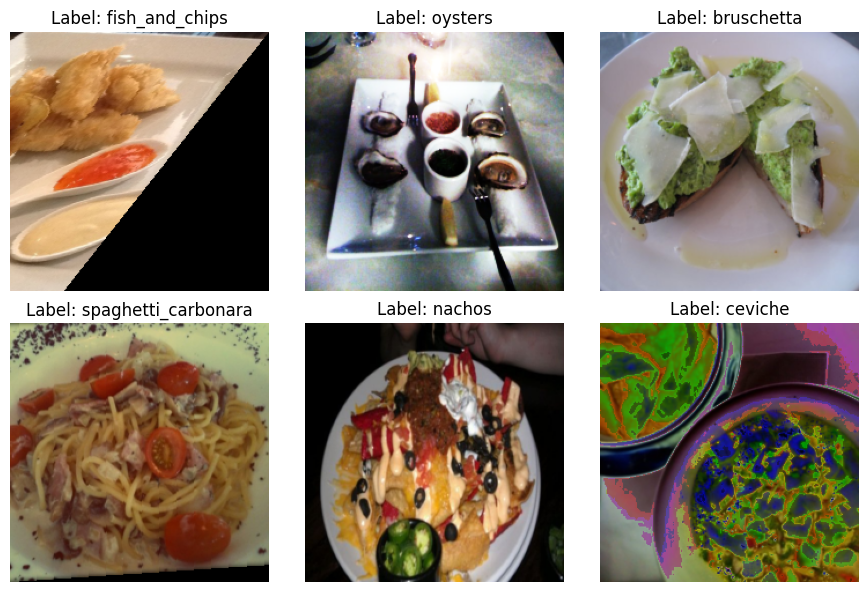

In [7]:
from helper.Visualize import plot_random_images
from helper.Visualize import plot_image

plot_random_images(train_data , num=6)

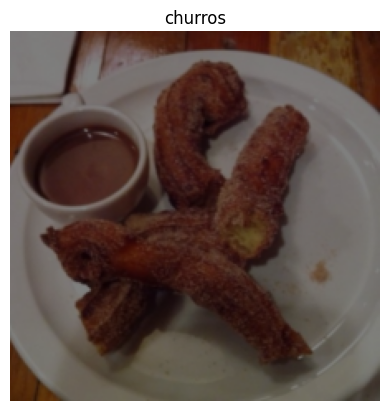

In [8]:
plot_image(train_data[0][0] , classes[train_data[0][1]])